# Latency

Data saved to: C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\03 - Latency\D2-HEPSYCODE-RAG\LLM-mistral-small-latest-1.0\JSON\token_distribution.csv


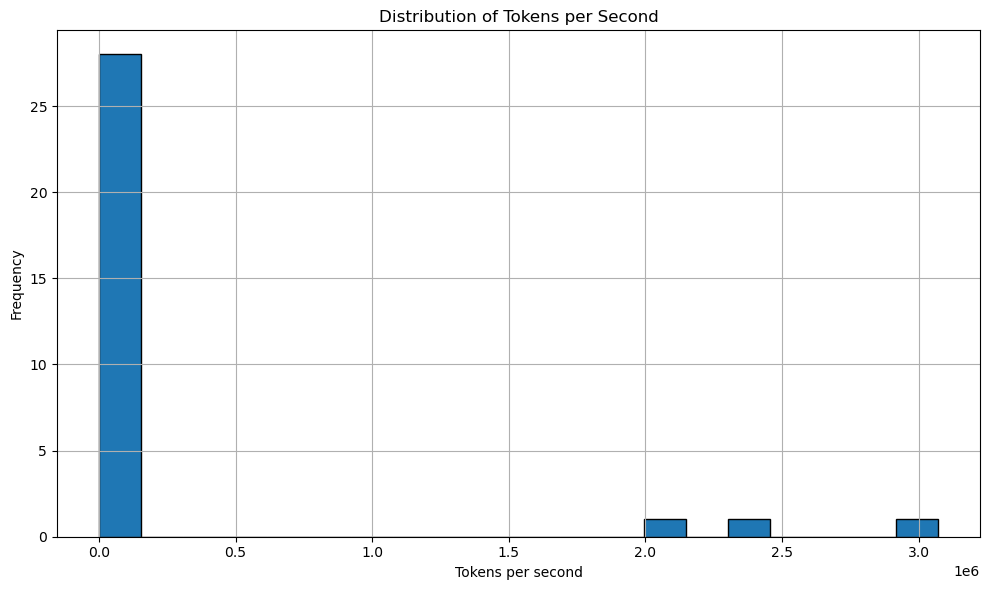

In [102]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to your folder containing the .bpmn files
directory = r"C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\03 - Latency\D2-HEPSYCODE-RAG\LLM-mistral-small-latest-1.0\JSON"

data = []

import os
import json
import pandas as pd
import matplotlib.pyplot as plt

for filename in os.listdir(directory):
    if filename.endswith(".hepsy"):
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r') as file:
                content = json.load(file)

                # Extract correct fields
                total_tokens = content.get("usage", {}).get("total_tokens")
                execution_time = content.get("execution_time")
                total_price = content.get("price_usd")

                if total_tokens is not None and execution_time not in (None, 0):
                    tokens_per_second = total_tokens / execution_time
                    data.append({
                        "file": filename,
                        "total_tokens": total_tokens,
                        "execution_time": execution_time,
                        "tokens_per_second": tokens_per_second,
                        "total_cost": total_price
                    })
                else:
                    print(f"[WARNING] Missing or zero values in: {filename}")
        except Exception as e:
            print(f"[ERROR] Could not read {filename}: {e}")

# Final processing
if data:
    df = pd.DataFrame(data)
    csv_path = os.path.join(directory, "token_distribution.csv")
    df.to_csv(csv_path, index=False)
    print(f"Data saved to: {csv_path}")
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(df["tokens_per_second"], bins=20, edgecolor='black')
    plt.title("Distribution of Tokens per Second")
    plt.xlabel("Tokens per second")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data found.")

Data saved to: C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\D2-BPMN-Designer-NoRAG\LLM-gpt-4o-2024-08-06-0.0\JSON\token_distribution.csv


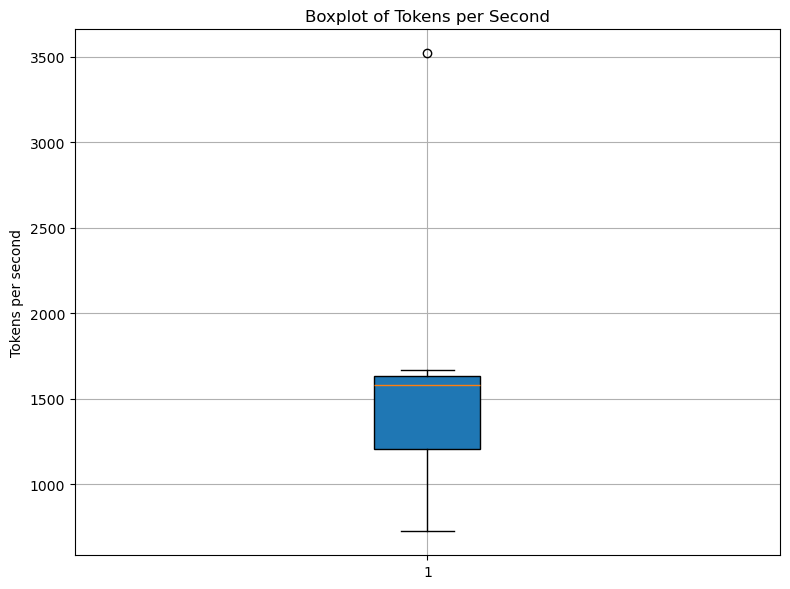

In [62]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to your folder containing the .bpmn files
directory = r"C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\D2-BPMN-Designer-NoRAG\LLM-gpt-4o-2024-08-06-0.0\JSON"

data = []

for filename in os.listdir(directory):
    if filename.endswith(".bpmn"):
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r') as file:
                content = json.load(file)

                total_tokens = content.get("usage", {}).get("total_tokens")
                execution_time = content.get("execution_time")
                total_price = content.get("price_usd")

                if total_tokens is not None and execution_time not in (None, 0):
                    tokens_per_second = total_tokens / execution_time
                    data.append({
                        "file": filename,
                        "total_tokens": total_tokens,
                        "execution_time": execution_time,
                        "tokens_per_second": tokens_per_second,
                        "total_cost": total_price
                    })
                else:
                    print(f"[WARNING] Missing or zero values in: {filename}")
        except Exception as e:
            print(f"[ERROR] Could not read {filename}: {e}")

# Final processing
if data:
    df = pd.DataFrame(data)
    csv_path = os.path.join(directory, "token_distribution.csv")
    df.to_csv(csv_path, index=False)
    print(f"Data saved to: {csv_path}")

    # Plot: Boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(df["tokens_per_second"], vert=True, patch_artist=True)
    plt.title("Boxplot of Tokens per Second")
    plt.ylabel("Tokens per second")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data found.")